### Homework: Monte Carlo Integration

#### Consider the following integration problem:

\begin{aligned}
 I = \int_a^b g(x) dx,
\end{aligned}

where $\{ a,b \}$ = $\{1, 2.5\}$ and $g(x) = 1/(1+x^2)$.

- Compute the expected value of $g(x)$: Write a Julia function to compute the expected value of $g(x)$ when $x \in (a,b)$ using the Monte Carlo method. That is, compute $E[g(x)]$, $x \in (a,b)$, which is NOT the same as the integration value $I$. The function should take $a$, $b$, and $n$ (the number of random draws) as inputs. The random numbers should be drawn from $[a,b]$. Show the numerical result with n=10,000.

- Compute the integration value $I$: Write down the solution of the integration problem as a function of the expected value of $g(x)$. Write a Julia function to compute the value, where the function should take $a$, $b$, and $n$ (the number of random draws) as inputs. Do not use the change of variables (yet). Show the numerical result with n=10,000.

 - Hint: The previous two questions force you to recognize that the integration problem of $I$ may not be stated as the expected value of $g(x)$.

- Compute the integration value $I$ using changes of variables: Write a Julia function which uses the change of variables to convert the problem's domain to $[0,1]$. The function should include the transformation rule and the Jacobian, and it should take $a$, $b$, and $n$ (the number of random draws) as inputs. Show the numerical result with n=10,000.

In [1]:
using Random

Random.seed!(138)

function expected_value(; a=1, b=2.5, n=10000)
    g(x)=1/ (1+x^2)
    x=rand(n)*(b-a) .+a # U(a, b)
    
    # not sum(g.(x)*(1/(b-a))) b/c x is already drawn from U(a,b)
    return (1/n) * sum( g.(x) )
end

expected_value(a=1, b=2.5, n=10000)


0.2699739166825011

In [2]:
# verify

a=1
b=2.5

using QuadGK
g(x)=1/(1+x^2) * 1/(b-a)
quadgk(g,1, 2.5)

(0.26992785752338894, 5.290828886117538e-11)

In [3]:
using Random

Random.seed!(138)

function integral_value(; a=1, b=2.5, n=10000)
    g(x)=1/ (1+x^2)
    x=rand(n)*(b-a) .+a # U(a, b)
    
    return  (b-a) *  (1/n) * sum(g.(x))
end

@show integral_value(a=1, b=2.5, n=10000)


integral_value(a = 1, b = 2.5, n = 10000) = 0.40496087502375167


0.40496087502375167

Consider the transformation $x=a+(b-a)t$, Jacoabian is $b-a$

In [4]:
using Random

Random.seed!(138)

function integral_jacobian(; a=1, b=2.5, n=10000)
    g(x)= 1/(1+x^2)
    f(t)= (b-a) * 1/(1+(a+(b-a)*t)^2) 
    t=rand(n) # U(0,1)
    
    return (1/n) * sum(f.(t))    
end


integral_jacobian(a=1, b=2.5, n=10000)

0.4049608750237516

#### Consider the following integration problem: 
\begin{aligned}
   I = \int_{-\infty}^\infty \exp\left(-\frac{1}{3}x^2\right)\sqrt{1+x^2} dx.
  \end{aligned}
  
- Use Monte Carlo integration to compute the following integration.
  - transform the infinite domain to $[0,1]$; mind the Jacobian;
  - draw random numbers from $[0,1]$;
  - compute the integration with a given $n$.
- Inspect the convergence path by computing $I$ using different $n$, and draw a graph with $n$ and $I$ on the horizontal and vertical axes, respectively.
 
 

Consider the transformation $x=\frac{2t-1}{t-t^2}$, Jacobian is $\frac{2t^2-2t+1}{(t^2-t)^2}$

In [6]:
using Random

Random.seed!(188)

function my_integral(; n=10000)
    g(x)=exp((-1/3)*x^2)*sqrt(1+x^2)
    f(t)=exp((-1/3)*((2*t-1)/(t-t^2))^2)*sqrt(1+((2*t-1)/(t-t^2))^2)*((2*t^2-2*t+1)/((t^2-t)^2))
    t=rand(n) # U(0,1)
    return (1/n)* sum(f.(t))
    
end

@show my_integral(n=100000)



my_integral(n = 100000) = 4.564834820728178


4.564834820728178

In [7]:
# verify result

using QuadGK

g(x)=exp((-1/3)*x^2)*sqrt(1+x^2)
quadgk(g, -Inf, Inf)

(4.563813002879844, 1.534671996550493e-8)

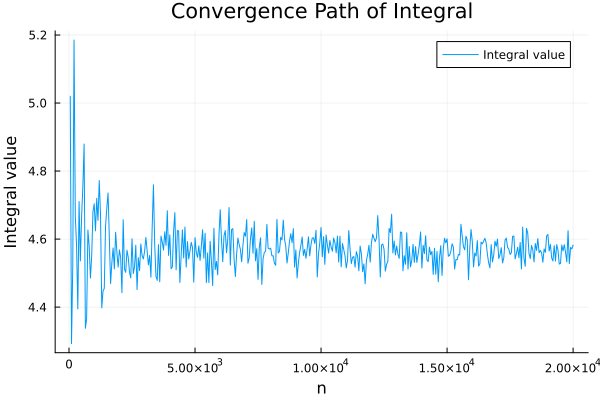

In [8]:
using Plots, WebIO, Interact

every = 50
n_end = 20000
n_start = every

n_values=n_start:every:n_end

my_integral_values= [my_integral(n=n) for n in n_values]

plot(n_values, my_integral_values, label="Integral value")
xlabel!("n")
ylabel!("Integral value")
title!("Convergence Path of Integral")



In [9]:
allgrids = Int(n_end/every)

@manipulate for grid in 1:allgrids 
    n1   = n_values[1:grid]  # the max of grid is allgrids
    approx1 = my_integral_values[1:grid]
    plot(n1, approx1, label="approx.=$(approx1[end])")
    hline!([4.5638130028798430179261736288958], label="  true =4.563813002879843") 
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["grid"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 400, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(200), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/weishangjie/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/weishangjie/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/weishangjie/.julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), Asset("css", nothing, "/Users/weishangjie/.julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), Asset("css", nothing, "/Users/weishangjie/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000016d630a20, Task (runnable) @0x000000016d630a20), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\",\"43\",\"44\",\"45\",\"46\",\